### Netflix data analysis

In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Load the dataset
df = pd.read_csv('mymoviedb.csv',lineterminator= '\n')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


### data cleaning and pre processing 

#### Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.

• our dataset looks a bit tidy with no NaNs nor duplicated values.

• Release_Date column needs to be casted into date time and to extract only the year value.

• Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we will drop them.

• there is noticable outliers in Popularity column

• Vote_Average bettter be categorised for proper analysis.

• Genre column has comma saperated values and white spaces that needs to be handled and casted into category.exploration summary.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [103]:
print(df.duplicated().value_counts())   # there is no duplicated data in the dataset

False    9827
Name: count, dtype: int64


In [104]:
df.isnull().sum()   # there are no null values in the dataset.

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [105]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [106]:
#change the data type of 'Release_Date' from object to datetime.
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [107]:
df.info()   #relase_date is now in datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [108]:
#we wants years only thats why we are extracting years only.
df['Release_Date'] = df['Release_Date'].dt.year   

In [109]:
# drop the column which we dont need
df.drop(['Overview','Original_Language','Poster_Url'], axis=1, inplace=True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


***categorizing Vote_Average column***

We would cut the Vote_Average values and make 4 categories: 

**1. popular** 

**2. average**

***3. below_avg*** 

**4. not_popular**

to describe it more using catigorize_col() function
provided above.


In [110]:
# create user-defined function to categorize the vote avarage column.
def catigorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [111]:
labels = ['not_popular','below_avg','average','popular']
catigorize_col(df, 'Vote_Average', labels)
df


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [112]:
print(df['Vote_Average'].value_counts())

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64


In [113]:
df.isna().sum()  # there are null values in the dataset after categorization

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [114]:
df.dropna(inplace=True)  # drop the null values
df.isna().sum()  # now there are no null values

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [115]:
df.shape

(9727, 6)

we'd split genres into a list and then explode our dataframe to have only one genre per row for each movies

In [116]:
df['Genre'] = df['Genre'].str.split(', ')
# Explode the 'Genre' column to have one genre per row
df = df.explode('Genre').reset_index(drop=True)
df.head(10)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
5,2022,The Batman,3827.658,1151,popular,Thriller
6,2022,No Exit,2618.087,122,below_avg,Thriller
7,2021,Encanto,2402.201,5076,popular,Animation
8,2021,Encanto,2402.201,5076,popular,Comedy
9,2021,Encanto,2402.201,5076,popular,Family


In [117]:
df.shape    

(25552, 6)

In [118]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [120]:
print(df.nunique())

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64


## Data Visualizations.

1. What is the most frequent genre of movies released on Nitflix.

In [121]:
print(df['Genre'].describe())

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object


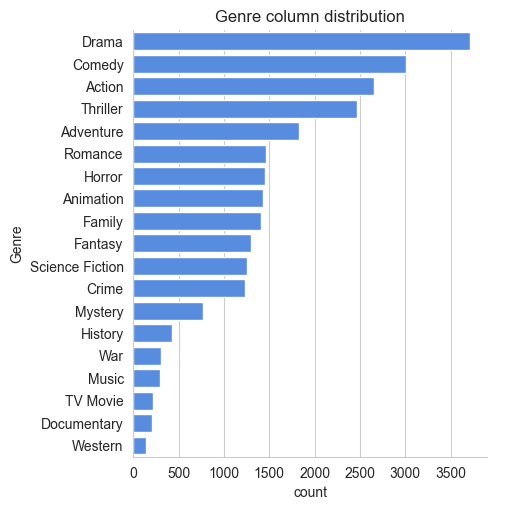

In [ ]:
sns.set_style('whitegrid')
sns.catplot(data = df, y = 'Genre', kind= 'count',order = df['Genre'].value_counts().index, color = '#4287f5')
plt.title('Genre column distribution')
plt.show() 

2. which has highest votes in vote avg column? 

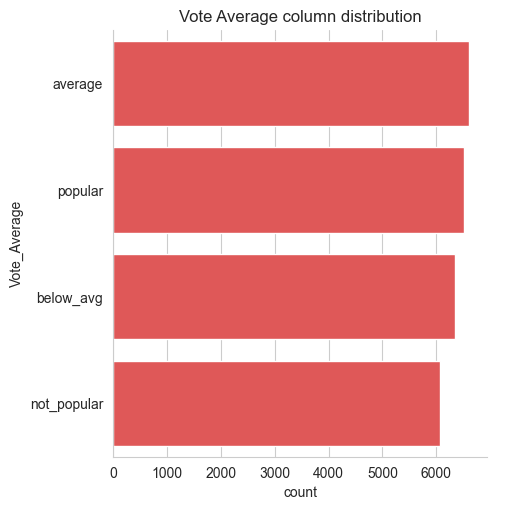

In [ ]:
sns.catplot(data = df, y = 'Vote_Average', kind= 'count', order = df['Vote_Average'].value_counts().index, color = '#f54242')
plt.title('Vote Average column distribution')
plt.show()

3. what movie got the highest popularity? what it's genre?

In [141]:
df[df['Popularity'] == df['Popularity'].max()][['Title', 'Popularity','Genre']]

,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,Action
1,Spider-Man: No Way Home,5083.954,Adventure
2,Spider-Man: No Way Home,5083.954,Science Fiction


4. what movie got the lowest popularity? what its genre?

In [142]:
df[df['Popularity'] == df['Popularity'].min()][['Title', 'Popularity','Genre']]

,Title,Popularity,Genre
25546,The United States vs. Billie Holiday,13.354,Music
25547,The United States vs. Billie Holiday,13.354,Drama
25548,The United States vs. Billie Holiday,13.354,History
25549,Threads,13.354,War
25550,Threads,13.354,Drama
25551,Threads,13.354,Science Fiction


5. which year has the most filmmed movies?

In [153]:
print(df.groupby('Release_Date')['Release_Date'].count().sort_values(ascending=False).head(10))

Release_Date
2021    1636
2018    1384
2017    1365
2019    1271
2016    1209
2020    1121
2015    1015
2014     922
2013     877
2011     855
Name: Release_Date, dtype: int64


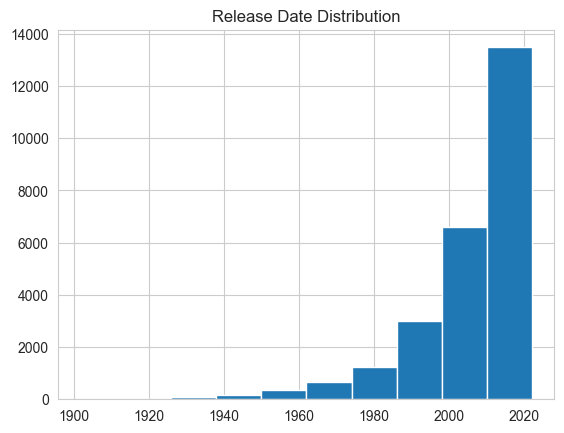

In [152]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()

## Conclusion
#### Q1: What is the most frequent genre in the dataset?
    Drama genre is the most frequent genre in our dataset and has appeared more than
    14% of the times among 19 other genres.

#### Q2: What genres has highest votes ?
    we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
    highest popularity among fans by being having more than 18.5% of movies popularities.

#### Q3: What movie got the highest popularity ? what's its genre ?
    Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
    genres of Action , Adventure and Sience Fiction.***

#### Q4: What movie got the lowest popularity ? what's its genre ?
    The united states, thread' has the highest lowest rate in our dataset
    and it has genres of music , drama , 'war', 'sci-fi' and history`.

#### Q5: Which year has the most filmmed movies?
    year 2020 has the highest filmming rate in our dataset